# Example: Multi-Layer Perceptron (MLP) <a class="tocSkip">

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import random
os.environ['CUDA_VISIBLE_DEVICES'] = ''

print ('tensorflow ver.{}'.format(tf.__version__))
tf.logging.set_verbosity(tf.logging.ERROR)

tensorflow ver.1.10.0


# Build Graph

## Data 읽어오기

In [2]:
def get_data():
    return input_data.read_data_sets("MNIST_data/", one_hot=True)

### - MNIST Data 살펴보기

In [3]:
mnist = get_data()

print 'train image num : ', mnist.train.images.shape
print 'train label num : ', mnist.train.labels.shape

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train image num :  (55000, 784)
train label num :  (55000, 10)


label :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


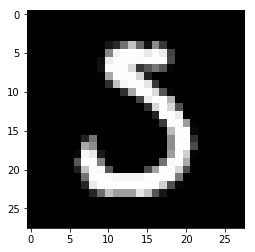

In [5]:
sample_idx = random.sample(range(mnist.train.images.shape[0]), 1)

sample_img = Image.fromarray(np.reshape(mnist.train.images[sample_idx]*255, (28, 28)).astype(np.int32))
sample_label = mnist.train.labels[sample_idx]

plt.imshow(sample_img)
print 'label : ', sample_label

## Model 정의

### build model

In [6]:
def build_model(x):
    W1 = tf.Variable(tf.random_normal([784, 128]), name='weight1')
    b1 = tf.Variable(tf.random_normal([128]), name='bias1')
    hidden_layer1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

    W2 = tf.Variable(tf.random_normal([128, 32]), name='weight2')
    b2 = tf.Variable(tf.random_normal([32]), name='bias2')
    hidden_layer2 = tf.nn.sigmoid(tf.matmul(hidden_layer1, W2) + b2)

    W3 = tf.Variable(tf.random_normal([32, 10]), name='weight3')
    b3 = tf.Variable(tf.random_normal([10]), name='bias3')
    logits = tf.matmul(hidden_layer2, W3) + b3
    prediction = tf.nn.softmax(logits)
    
    return {'logits': logits, 'prediction': prediction}

## Loss 정의

In [7]:
def get_loss(y, model):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model['logits'], labels=y))
    return loss

## Optimizer 설정

In [8]:
def get_optimizer():
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    return optimizer

## Train Step 정의

In [9]:
def get_train_step(loss, optimizer):
    train_step = optimizer.minimize(loss)

    return train_step

## Graph 정의

In [10]:
# 데이터 읽어오기
mnist = get_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
# `Placeholder`: graph input 설정
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

>`placeholder`
    * shape : [None, 784]
        * None
            * 정해지지 않음
            * 이미지를 여러장 씩 병렬처리
        * 784
            * 28x28이미지를 1-D로 표현

In [12]:
# Model 정의
model = build_model(x)

# Loss 정의
loss = get_loss(y, model)

# Optimizer 설정
optimizer = get_optimizer()

# Train Step 정의
train_step = get_train_step(loss, optimizer)

---

# Run Graph

## Session 생성 및 Variable 초기화

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Graph 실행
* `batch` : 동시에 처리하는 데이터 묶음
* `1 epoch` : 전체 데이터셋을 한 번 training에 사용
* `1 step(iteration)` : training 연산을 한 번 실행
* MNIST train image 수 55,000
    * batch size : 100
    * 1 epoch을 위해서는 55,000/100 = 550 step 수행 필요

In [14]:
train_images_size = mnist.train.images.shape[0]
batch_size = 100
num_batch_per_epoch = int(math.ceil(train_images_size / batch_size))
num_epoch = 2

# Accuracy 정의
correct_prediction = tf.equal(tf.argmax(model['prediction'], 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for idx in range(num_batch_per_epoch*num_epoch):
    # load data
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    if idx % 100 == 0:
        _accuracy, _loss = sess.run([accuracy, loss], feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print ('[{:04d} step] accuracy : {:.4f}, loss :{:.4f}'.format(idx, _accuracy, _loss))
    # train
    sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})

[0000 step] accuracy : 0.0838, loss :5.9694
[0100 step] accuracy : 0.2818, loss :2.1399
[0200 step] accuracy : 0.4218, loss :1.7574
[0300 step] accuracy : 0.5133, loss :1.5161
[0400 step] accuracy : 0.5779, loss :1.3337
[0500 step] accuracy : 0.6234, loss :1.2023
[0600 step] accuracy : 0.6525, loss :1.1015
[0700 step] accuracy : 0.6813, loss :1.0189
[0800 step] accuracy : 0.6999, loss :0.9527
[0900 step] accuracy : 0.7209, loss :0.8972
[1000 step] accuracy : 0.7368, loss :0.8492


## Test

gt label :  6


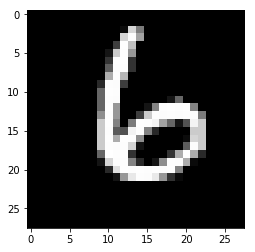

In [15]:
test_idx = random.sample(range(mnist.test.images.shape[0]), 1)

test_img = Image.fromarray(np.reshape(mnist.test.images[test_idx]*255, (28, 28)).astype(np.int32))
test_label = mnist.test.labels[test_idx]

plt.imshow(test_img)
print 'gt label : ', np.argmax(test_label)

In [16]:
_prediction = sess.run(model['prediction'], feed_dict={x:mnist.test.images[test_idx], y:mnist.test.labels[test_idx]})

prediction_label = np.argmax(_prediction[0])
prediction_score = _prediction[0][prediction_label]
print 'prediction label : {}, score: {:.4f}'.format(prediction_label, prediction_score)

prediction label : 6, score: 0.8537
